In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# A. 데이터 전처리

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
csv_path = 'NFLX.csv'
df = pd.read_csv(csv_path, usecols=range(0, 5))
#df = pd.read_csv(csv_path)
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [20]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

# B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기

In [21]:
#날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [27]:
#2021년도 이후 종가 데이터 필터링

new_df = pd.read_csv(csv_path, usecols=range(0, 5))
df_after_2021 = new_df[new_df['Date'] >= "2021-01-01"]
df_after_2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


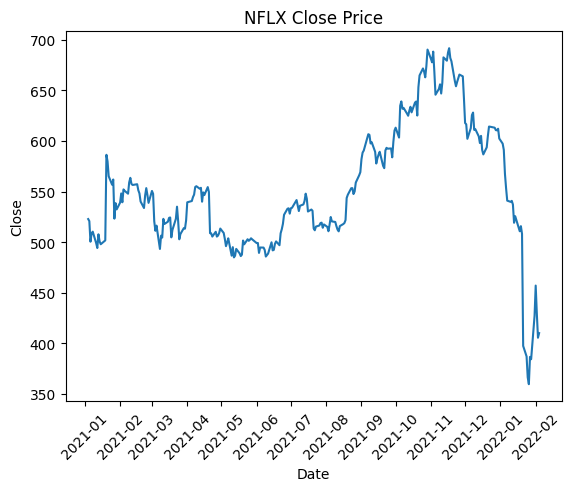

In [140]:
#x축, y축 순서로
plt.plot(df_after_2021['Date'], df_after_2021['Close'])
#그래프 제목
plt.title('NFLX Close Price')


plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)

from matplotlib import dates
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))

plt.show()

# C. 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기

In [141]:
max_Close_Price = df_after_2021['Close'].max()
min_Close_Price = df_after_2021['Close'].min()
print(f'최고 종가: {max_Close_Price:.2f}')
print(f'최저 종가: {min_Close_Price:.2f}')

최고 종가: 691.69
최저 종가: 359.70


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기


In [142]:
df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])
df_after_2021.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_17064\682768959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

C:\Users\User\AppData\Local\Temp\ipykernel_17064\874144539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_Close_Month = df_after_2021.groupby(pd.Grouper(key="Date", freq="M"))['Close'].mean()


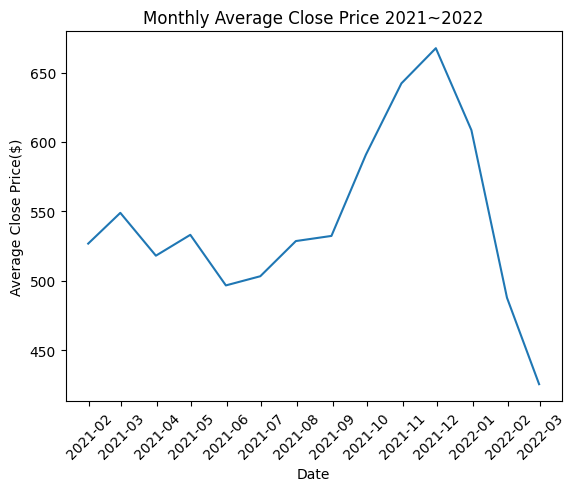

In [143]:
df_Close_Month = df_after_2021.groupby(pd.Grouper(key="Date", freq="M"))['Close'].mean()

plt.plot(df_Close_Month)
plt.title('Monthly Average Close Price 2021~2022')
plt.xlabel('Date')
plt.ylabel('Average Close Price($)')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))

plt.show()

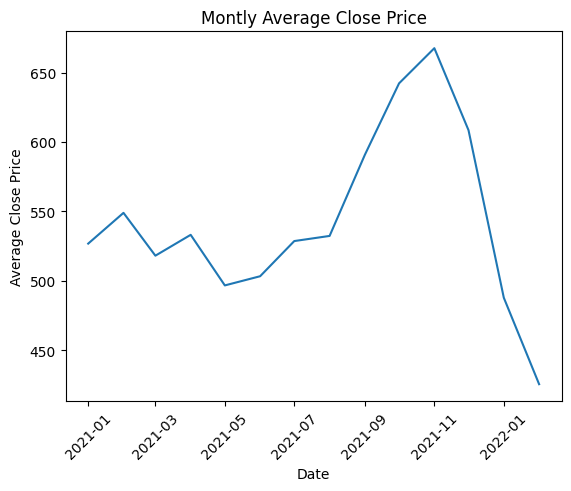

In [ ]:
#강사님 작성 코드

#월별 평균 증가 계산
monthly_average_close = df_after_2021.groupby(df_after_2021['Date'].dt.to_period('M')).mean(numeric_only=True)
#행이 변경되었으므로, 다시 변경
monthly_average_close.reset_index(inplace=True)
#'Date'를 datetime 형식으로 변환
monthly_average_close['Date'] = monthly_average_close['Date'].dt.to_timestamp()

monthly_average_close

plt.plot(monthly_average_close['Date'], monthly_average_close['Close'])
plt.title('Montly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation = 45)
plt.show()

# E. 데이터 시각화 – 2022년 이후 최고, 최저, 종가 시각화하기

In [134]:
df_after_2022 = new_df[new_df['Date'] >= "2022-01-01"]

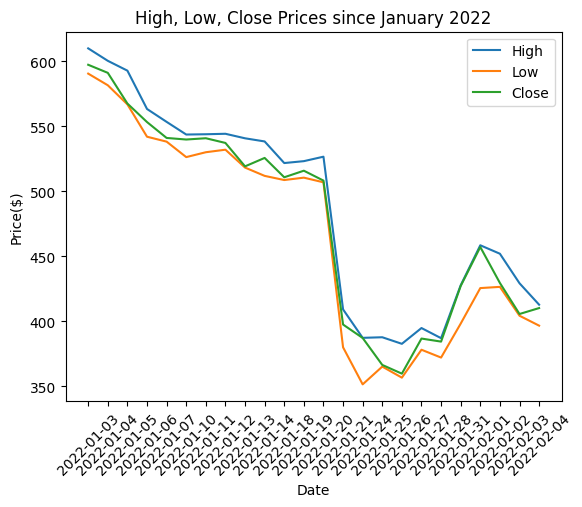

In [ ]:
plt.plot(df_after_2022['Date'], df_after_2022['High'], label='High')
plt.plot(df_after_2022['Date'], df_after_2022['Low'], label='Low')
plt.plot(df_after_2022['Date'], df_after_2022['Close'], label='Close')

plt.title('High, Low, Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price($)')

# x축 45도 회전
plt.xticks(rotation=45)
#ax = plt.gca()
#ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.legend()
plt.show()

# 6. 간단한 데이터 분석(상관 관계)

In [55]:
# 1년 + 1개월 데이터 추출
df = df.tail(13)

# 마지막 개월의 Close, (iloc: 행)
last_month_close = df['Close'].iloc[-1]
# 마지막 개월을 제외한 1년의 데이터
High_Close = df['High'].iloc[:-1]
Low_Close = df['Low'].iloc[:-1]
volume_Close = df['Volume'].iloc[:-1]


# .corr() 메서드 사용: 1에 가까울수록 상관관계가 크다, 0에 가까울수록 상관관계가 없음, -1에 가까울수록 상관관계가 반비례
High_Close_corr = High_Close.corr(df['Close'])
Low_Close_corr = Low_Close.corr(df['Close'])
volume_Close_corr = volume_Close.corr(df['Close'])

# 분석 결과 출력
print(f'High와 Close의 상관관계: {High_Close_corr}')
print(f'Low와 Close의 상관관계: {Low_Close_corr}')
print(f'Volume과 Close의 상관관계: {volume_Close_corr} \n')
print(f'평균 최고가: {df['High'].iloc[:-1].mean()}')
print(f'평균 최저가: {df['Low'].iloc[:-1].mean()}')
print(f'평균 거래량: {df['Volume'].iloc[:-1].mean()}')

High와 Close의 상관관계: 0.7467644674963533
Low와 Close의 상관관계: 0.7784705369457524
Volume과 Close의 상관관계: 0.16764687924467012 

평균 최고가: 113.57
평균 최저가: 95.92000000000002
평균 거래량: 732295458.3333334


# 분석결과
  지난 1년의 High 가격과 마지막 개월의 Close 가격과의 상관관계: 0.74 
  지난 1년의 Low 가격과 마지막 개월의 Close 가격과의 상관관계: 0.77
  일반적으로 0.7 이상의 점수: 강한 상관 관계
  즉, 3월과 4월의 최고가, 최저가가 상향하는 것으로 보인다.
  5월에도 오를 것으로 보이니 매수하자(분석 예시)